<a href="https://colab.research.google.com/github/svrohith9/crazy-stuff/blob/master/Algorithm_MA_Trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#Description: Program uses Dual moving averages crossover to determine the trade

In [85]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load data
from google.colab import files

uploaded = files.upload()

In [ ]:
apple = pd.read_csv('AAPL.csv')
apple.head()

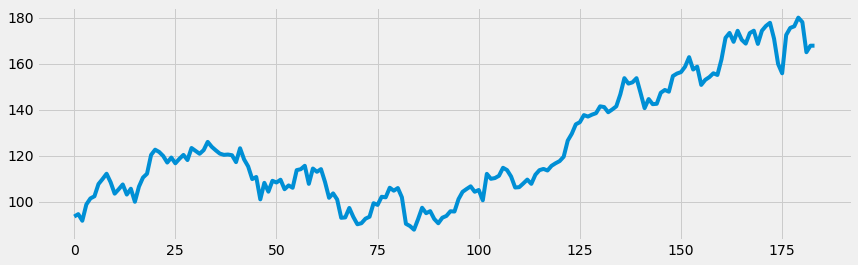

In [43]:
#visualize the data
plt.figure(figsize =(13,4))
plt.plot(apple['Adj Close'], label='APPL')

In [44]:
#Setting Simple moving avg for 30 days
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = apple['Adj Close'].rolling(window = 30).mean()

In [45]:
#Setting SMA for 100 days
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = apple['Adj Close'].rolling(window = 100).mean()

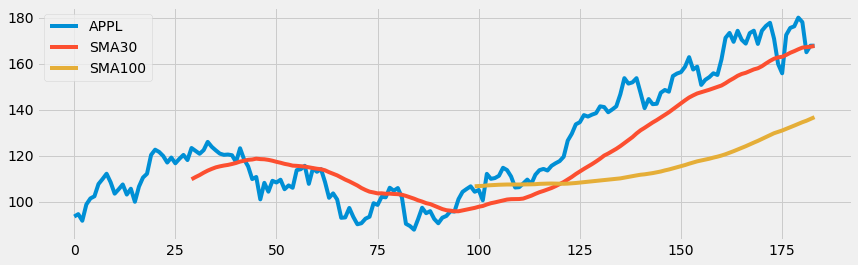

In [46]:
#visualize the data
plt.figure(figsize =(13,4))
plt.plot(apple['Adj Close'], label='APPL')
plt.plot(SMA30['Adj Close'], label="SMA30")
plt.plot(SMA100['Adj Close'], label="SMA100")
plt.legend(loc ='upper left')

In [71]:
#create new data frame to store data
data = pd.DataFrame()
data['AAPL'] = apple['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] =SMA100['Adj Close']

In [82]:
#Indicate BUY and SELL signal 
def buy_sell(data):
  signalBuy = []
  signalSell = []
  flag = -1
  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        signalBuy.append(data['AAPL'][i])
        signalSell.append(np.nan)
        flag = 1
      else:
        signalSell.append(np.nan)
        signalBuy.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        signalSell.append(data['AAPL'][i])
        signalBuy.append(np.nan)
        flag = 0
      else:
        signalSell.append(np.nan)
        signalBuy.append(np.nan)
    else:
      signalSell.append(np.nan)
      signalBuy.append(np.nan)
  return (signalBuy, signalSell)

In [83]:
#trade data into variable
buy_sell = buy_sell(data)
data['BUY'] = buy_sell[0]
data['SELL'] = buy_sell[1]

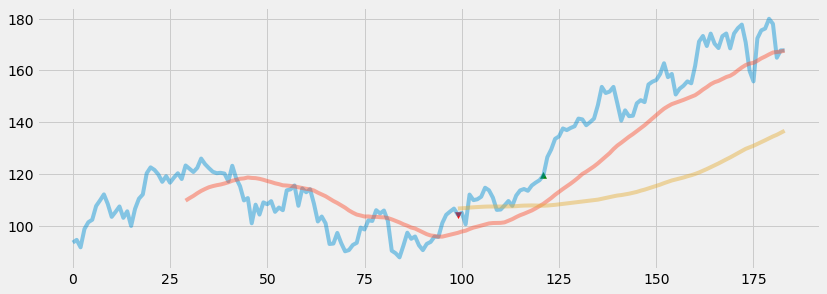

In [84]:
#show data along with predicted indicators
plt.figure(figsize=(12.5, 4.5))
plt.plot(data['AAPL'], label='AAPL', alpha = 0.45)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.45)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.45)
plt.scatter(data.index, data['BUY'], label = 'BUY', marker = '^', color ='green')
plt.scatter(data.index, data['SELL'], label = 'SELL', marker = 'v', color ='red')